In [1]:
import tensorflow as tf
import numpy as np

In [2]:
fmnist = tf.keras.datasets.fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
train_labels [0]

9

In [6]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

train label 5


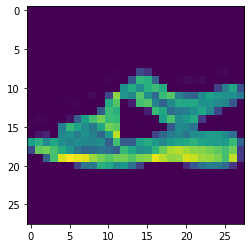

In [7]:
import numpy as np
import matplotlib.pyplot as plt

index = 43

print(f'train label {train_labels[index]}')

plt.imshow(train_data[index]);

In [8]:
train_data = train_data/255.0
test_data = test_data/255.0

In [9]:
train_data[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')                     
])

In [12]:
# Softmax function

input = np.array([[1.0, 3.0, 4.0, 8.0]])
input_tf = tf.convert_to_tensor(input)

output = tf.keras.activations.softmax(input_tf) #softmax function does not operate on 1D, so it only operate on tensors so input converted to input_tf
output

#sum = tf.reduce_sum(output)
#sum



<tf.Tensor: shape=(1, 4), dtype=float64, numpy=array([[8.88803760e-04, 6.56742084e-03, 1.78521007e-02, 9.74691675e-01]])>

In [13]:
type(input), type(input_tf)

(numpy.ndarray, tensorflow.python.framework.ops.EagerTensor)

In [14]:
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [15]:
model.fit(train_data, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5036 - accuracy: 0.8232
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3800 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3408 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3155 - accuracy: 0.8846
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2978 - accuracy: 0.8891


In [39]:
loss, accuracy = model.evaluate(test_data, test_labels)

accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.3444 - accuracy: 0.8763


0.8762999773025513

In [17]:
classification = model.predict(test_data)
classification.shape

(10000, 10)

In [18]:
tf.unique(test_labels)

Unique(y=<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([9, 2, 1, 6, 4, 5, 7, 3, 8, 0], dtype=uint8)>, idx=<tf.Tensor: shape=(10000,), dtype=int32, numpy=array([0, 1, 2, ..., 8, 2, 5], dtype=int32)>)

In [24]:
classification[0] # 10th numberin the list has the highest value means most possiblity/probability predicted by model

array([1.2736705e-06, 5.2106830e-09, 1.2991395e-06, 4.0922743e-10,
       6.4831494e-07, 9.7597055e-03, 3.0434533e-06, 4.0611021e-02,
       3.6794472e-06, 9.4961923e-01], dtype=float32)

In [35]:
# This gives the maximum probability for an image in the classification problem

def find_item(img_number):

  x = img_number
  label_index = tf.argmax(classification[x]).numpy()
  return label_index

In [34]:
find_item(2)

1

In [59]:
model1 = tf.keras.Sequential([
         tf.keras.layers.Flatten(input_shape = (28,28)),
         tf.keras.layers.Dense(units = 1024, activation = 'relu'),
         tf.keras.layers.Dense(units = 10, activation = 'softmax')                     
])

In [62]:

model1.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = 'Adam',
               metrics = ['accuracy'])

In [63]:
model1.fit(train_data, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4705 - accuracy: 0.8307
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3596 - accuracy: 0.8677
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3209 - accuracy: 0.8824
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2971 - accuracy: 0.8894
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2775 - accuracy: 0.8970


In [64]:
loss1, accuracy1 = model1.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3379 - accuracy: 0.8817


In [70]:
# Call back- it is used to stop training the model after desired accuracy is reached.

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs = {}):
    if (logs.get('accuracy') > 0.6):
      print('\nReached 60% accuracy so stopping training.')
      self.model.stop_training = True


callbacks = myCallback()
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()
training_images = training_images/255.0
test_images  = test_images/255.0

model3 = tf.keras.Sequential([
         tf.keras.layers.Flatten(input_shape = (28,28)),
         tf.keras.layers.Dense(units = 512, activation = 'relu'),
         tf.keras.layers.Dense(units = 10, activation = 'softmax')                     
])

model3.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = 'Adam',
               metrics = ['accuracy'])
model3.fit(training_images, training_labels, epochs = 5, callbacks = [callbacks] ) # call back is added here in model.fit

model3.evaluate(test_images, test_labels)



Epoch 1/5
1869/1875 [============================>.] - ETA: 0s - loss: 0.4723 - accuracy: 0.8308
Reached 60% accuracy so stopping training.
313/313 [==============================] - 1s 2ms/step - loss: 0.4315 - accuracy: 0.8401


[0.43149513006210327, 0.8400999903678894]